# 📔 Análise  - A segunda etapa da Pré Modelagem

## 1.0 Bibliotecas e Leitura de Dados 

In [44]:
# Bibliotecas utilizadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Lendo dados preprocessados
path = 'Churn_Telecon_Pre_Processado.xls'
df_churn = pd.read_csv(path)
df_churn.head()

,ID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,65.607563,1022.95,No


## 2.0 Análise Univariada

### 2.1 Estatísticas Básicas
- A partir dessa análise, a variável que mais parece ter os dados pouco equilibrados é a Total_Pago, pois a diferença entre a média, o valor máximo e os 50% é bem grande, então tende-se a acreditar que o equilíbrio dos dados esteja mais elevado para a parte superior, o que é confirmado a partir do gráfico Boxplot dele.
- Existe também uma discrepância entre a média e os 50% na variável Tempo_como_Cliente, porém, após gerar um gráfico de caixa, pode-se observar que essa diferença é mínima, portanto não é necessário ver como um problema. 

In [46]:
# Visualizando métricas básicas 
df_churn.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,27.984700,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,65.607563,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


In [47]:
# Calculando mediana e média da variável Total_Pago
TotalPago_Mediana = df_churn['Total_Pago'].median()
TotalPago_Media = df_churn['Total_Pago'].mean()
print("Mediana Total_Pago: {}\nMédia Total_Pago: {}".format(TotalPago_Mediana, TotalPago_Media))

Mediana Total_Pago: 1402.9
Média Total_Pago: 2290.0871784565916


### 2.2 Análise de Variáveis Numéricas

#### 2.2.1 Análise da Variável Total Pago

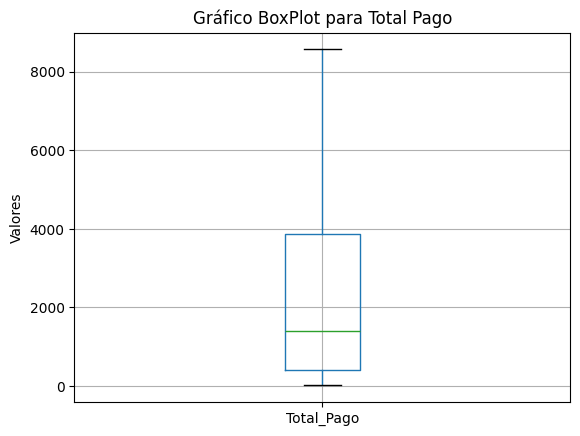

In [48]:
# Criando gráfico de caixa para a variável Total_Pago
df_churn.boxplot(column='Total_Pago')

# Customizando gráfico
plt.title("Gráfico BoxPlot para Total Pago")
plt.ylabel("Valores")

# Exibindo gráfico
plt.show()

#### 2.2.2 Análise da Variável Tempo como Cliente

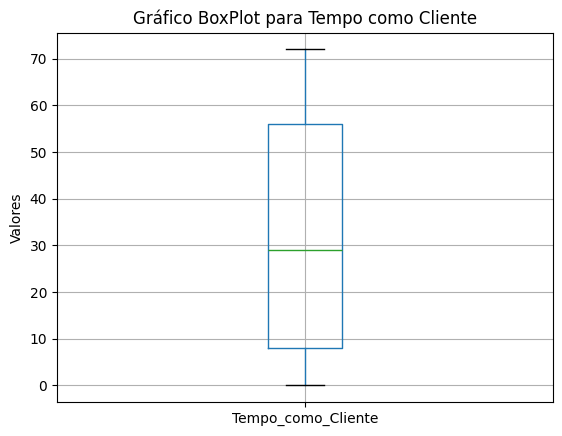

In [49]:
# Criando gráfico de caixa para a variável Tempo_como_Cliente
df_churn.boxplot(column='Tempo_como_Cliente')

# Customizando gráfico
plt.title("Gráfico BoxPlot para Tempo como Cliente")
plt.ylabel("Valores")

# Exibindo gráfico
plt.show()

### 2.3 Análise de Variáveis Categóricas

#### 2.3.1 Análise da Variável Gênero
- De acordo com a visualização, é notável que a clase é bem balanceada entre Feminino e Masculino (51% e 49%, respectivamente).

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\3291752436.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



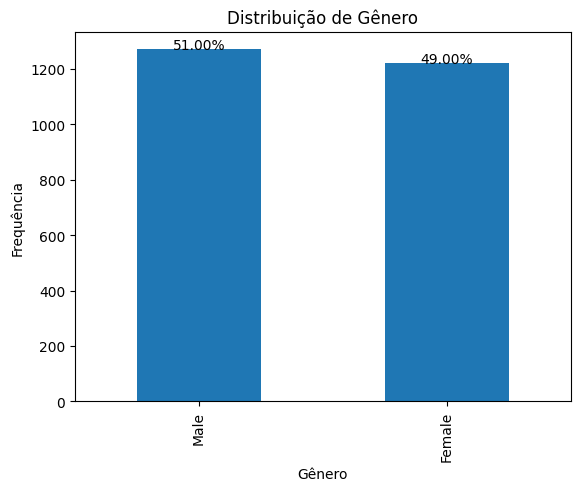

In [50]:
# Calculando quantidade de dados para cada classe e a porcentagem sobre o total
contagem_genero = df_churn['Genero'].value_counts()
porcentagem_genero = (contagem_genero/contagem_genero.sum()) * 100

# Criando gráfico para genero
genero = contagem_genero.plot(kind='bar')

# Adicionando as porcentagens no gráfico
for i, v in enumerate(contagem_genero):
    genero.text(i, v + 1, f'{porcentagem_genero[i]:.2f}%', ha='center')

# Estilizando gráfico
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Exibindo gráfico
plt.show()

#### 2.3.2 Análise da Variável Método Pagamento 
- A partir dessa análise, pode-se verificar que a classe 'Eletronic check' (33%) tem uma frequencia maior acerca das demais classes (21-23%), uma diferença de mais ou menos 10%. 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\907836539.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



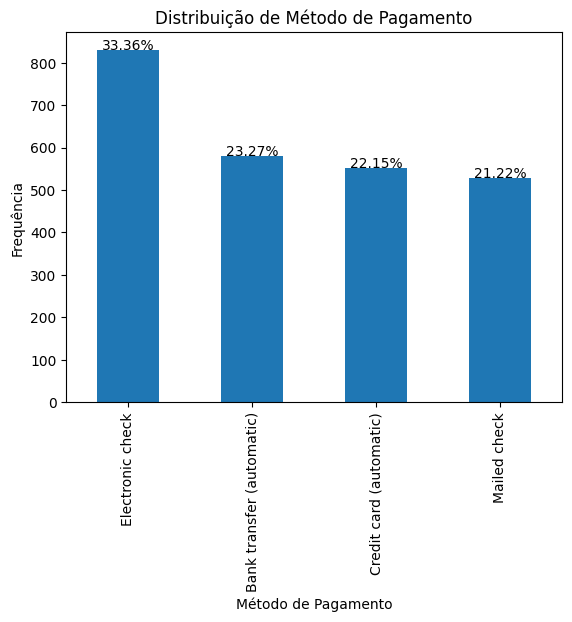

In [51]:
# Calculando contagem e porcentagem da variável Método de Pagamento
contagem_metodoP = df_churn['Metodo_Pagamento'].value_counts()
porcentagem_metodoP = (contagem_metodoP/contagem_metodoP.sum()) * 100 

# Criando gráfico para Método de Pagamento
metodo = contagem_metodoP.plot(kind='bar')

# Adicionando porcentagens no gráfico
for i, v in enumerate(contagem_metodoP):
    metodo.text(i, v + 1, f'{porcentagem_metodoP[i]:.2f}%', ha='center')

# Customizando gráfico
plt.title('Distribuição de Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')

# Exibindo gráfico
plt.show()

#### 2.3.3 Análise da Variável Churn
- De acordo com a análise do gráfico da Distribuição da Classe Churn, pode-se verificar que existe uma Classe Majoritária em No (74%), como uma diferença de quase 50% entre a classe Yes (26%).

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\1181910699.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



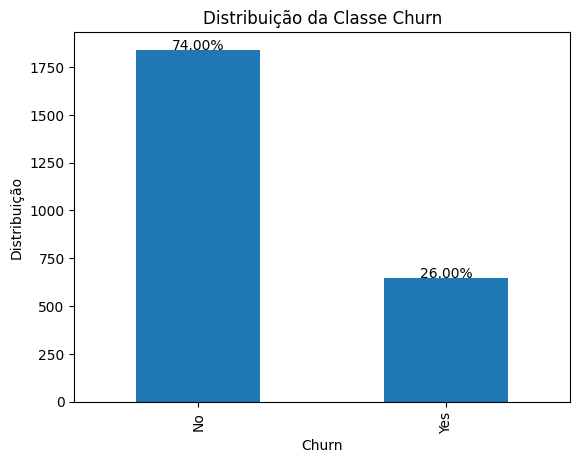

In [52]:
# Calculando contagem e porcentagem da variável Churn
contagem_churn = df_churn['Churn'].value_counts()
porcentagem_churn = (contagem_churn/contagem_churn.sum()) * 100

# Criando gráfico
churn = contagem_churn.plot(kind='bar')

# Aplicando porcentagens ao gráfico
for i, v in enumerate(contagem_churn):
    churn.text(i, v + 1, f'{porcentagem_churn[i]:.2f}%', ha='center')

# Customizando gráfic
plt.title('Distribuição da Classe Churn')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

#### 2.3.4 Análise da Variável Tipo Contrato
- A partir dessa análise, pode-se verificar que a classe 'Month-to-month' tem uma frequencia maior (55%) acerca das demais classes (20-24%), uma diferença de mais ou menos 30%. Portanto existe uma classe majoritária em 'Month-to-month'.

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\2147381671.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



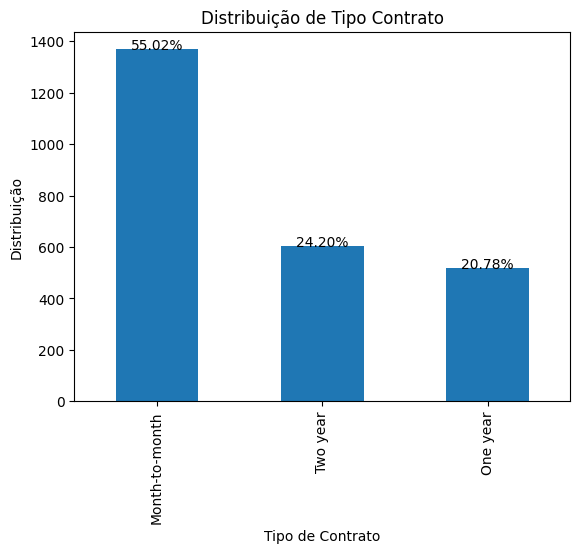

In [53]:
# Calculando contagem e porcentagem da variável Tipo_Contrato
contagem_Tipo_Contrato = df_churn['Tipo_Contrato'].value_counts()
porcentagem_Tipo_Contrato = (contagem_Tipo_Contrato/contagem_Tipo_Contrato.sum()) * 100

# Criando gráfico
Tipo_Contrato = contagem_Tipo_Contrato.plot(kind='bar')

# Aplicando porcentagens ao gráfico
for i, v in enumerate(contagem_Tipo_Contrato):
    Tipo_Contrato.text(i, v + 1, f'{porcentagem_Tipo_Contrato[i]:.2f}%', ha='center')

# Customizando gráfic
plt.title('Distribuição de Tipo Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

#### 2.3.5 Análise da Variável Streaming TV
- A partir da análise do gráfico, é possível destacar as classe "No" e "Yes" com maior quantidade de dados (40% e 38%, respectivamente), tendo uma diferença de 2% entre elas, enquanto a classe "No internet service" tem uma porcentagem bem abaixo das demais, com mais ou menos 10% de diferença (21%). 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\3995847066.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



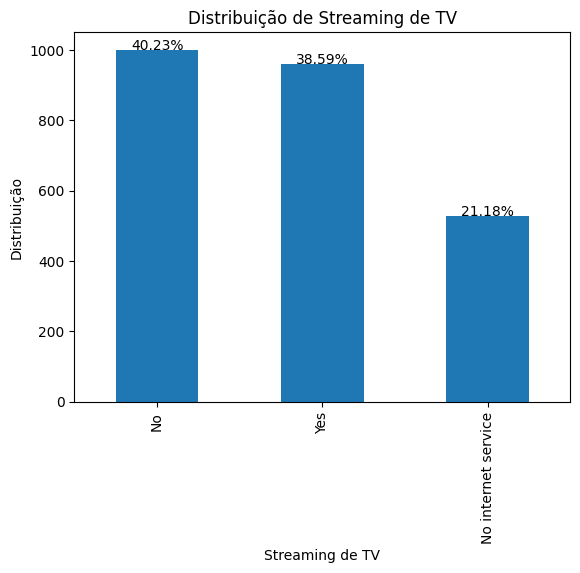

In [54]:
# Calculando contagem e porcentagem da variável Streaming_TV
contagem_Streaming_TV = df_churn['Streaming_TV'].value_counts()
porcentagem_Streaming_TV = (contagem_Streaming_TV/contagem_Streaming_TV.sum()) * 100

# Criando gráfico
Streaming_TV = contagem_Streaming_TV.plot(kind='bar')

# Aplicando porcentagens ao gráfico
for i, v in enumerate(contagem_Streaming_TV):
    Streaming_TV.text(i, v + 1, f'{porcentagem_Streaming_TV[i]:.2f}%', ha='center')

# Customizando gráfic
plt.title('Distribuição de Streaming de TV')
plt.xlabel('Streaming de TV')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

### 2.4 Análise de Variáveis Booleanas

#### 2.4.1 Análise da Variável Casado
- A análise mostra que essa variável está bem equilibrada entre casados (49%) e não casados (51%). 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\75655449.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



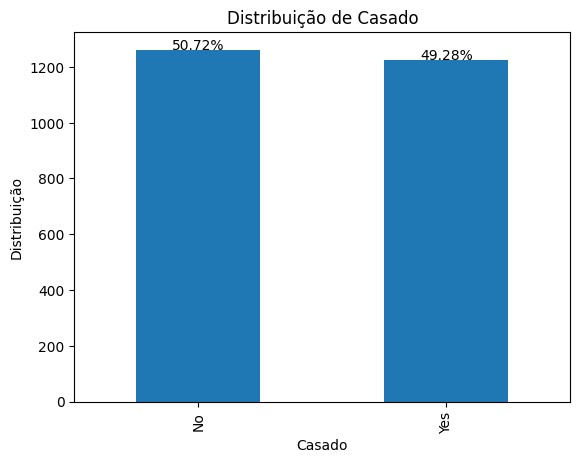

In [55]:
# Calculando contagem e porcentagem da variável Casado
contagem_Casado = df_churn['Casado'].value_counts()
porcentagem_Casado = (contagem_Casado/contagem_Casado.sum()) * 100

# Criando gráfico
Casado = contagem_Casado.plot(kind='bar')

# Aplicando porcentagens ao gráfico
for i, v in enumerate(contagem_Casado):
    Casado.text(i, v + 1, f'{porcentagem_Casado[i]:.2f}%', ha='center')

# Customizando gráfic
plt.title('Distribuição de Casado')
plt.xlabel('Casado')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

#### 2.4.2 Análise da Variável Dependentes
- A análise mostra que o número de dependentes (31%) é bem menor do que aqueles que não possuem dependentes (68%), uma diferença de mais ou menos 37%. Portanto existe uma classe majoritária em "No".

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\2564064421.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



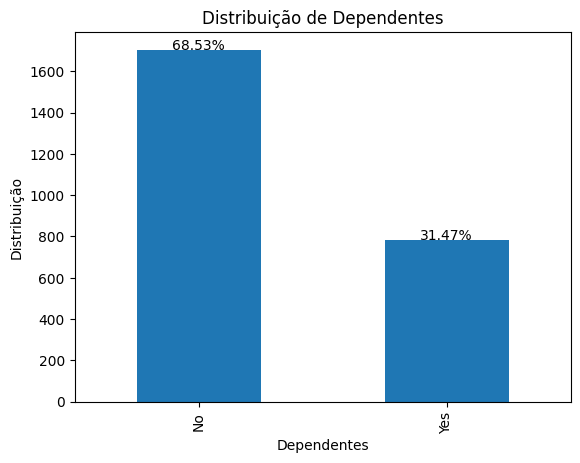

In [56]:
# Calculando contagem e porcentagem da variável Dependentes
contagem_Dependentes = df_churn['Dependentes'].value_counts()
porcentagem_Dependentes = (contagem_Dependentes/contagem_Dependentes.sum()) * 100

# Criando gráfico
Dependentes = contagem_Dependentes.plot(kind='bar')

# Aplicando porcentagens ao gráfico
for i, v in enumerate(contagem_Dependentes):
    Dependentes.text(i, v + 1, f'{porcentagem_Dependentes[i]:.2f}%', ha='center')

# Customizando gráfic
plt.title('Distribuição de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

#### 2.4.3 Análise da Variável Idoso
- Como essa variável é do tipo Booleano, o describe dela não é fiel ao equilíbrio real das classes, por isso é interessante criar um gráfico de barras para verificar essa distribuição.
- A partir do gráfico, pode-se verificar que existem poucos idosos na base de dados, ou seja, sua maioria não é idoso. 
- Nesse caso, é classificado a variável Idoso como Classe Majoritária (0).

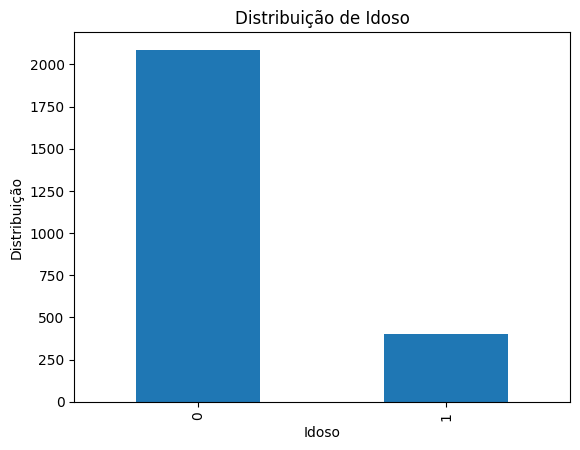

In [57]:
# Contando quantidade de dados da variável Idoso para cada classe
contagem_idoso = df_churn['Idoso'].value_counts()

# Calculando porcentagem de Idoso para cada classe 
porcentagem_idoso = (contagem_idoso/contagem_idoso.sum()) * 100 

# Criando gráfico de barras 
ax = contagem_idoso.plot(kind='bar')

# Customizando gráfico
plt.title('Distribuição de Idoso')
plt.xlabel('Idoso')
plt.ylabel('Distribuição')

# Exibindo gráfico
plt.show()

## 3.0 Tratamento de Outliers
- A única variável identificada com uma leve oscilação na distribuição dos dados foi Total_Pago, porém, de acordo com a análise anterior, os dados parecem condizer com o esperado, mesmo que alguns registros estejam maiores que a média, é possível que eles estejam corretos. Dessa forma, o tratamento de Outlier não será necessário. 

## 4.0 Análise Bivariada
- Métricas:
    - Mulheres estão mais propensas a Churn que homens? (Classe (Churn) → Gênero);
    - Será que idosos são mais propensos a Churn? (Classe (Churn) → Idoso );
    - Será que o tempo como cliente influencia se ele vai se tornar Churn? (Classe (Churn) → Tempo_como_Cliente);
    - Quanto o cliente pagou de acordo com o seu tipo de contrato? E isso pode influenciar em ele se tornar Churn? (Classe (Churn) → Tipo_Contrato e Total_Pago);
    - Qual será o método de pagamento mais utilizado pelos clientes Churn? (Classe (Churn) → Metodo_Pagamento)


### 4.1 Relação entre Gênero e Classe (Churn)
- A partir dessa análise, é bastante notável que o gênero não tem influência direta se o cliente é ou não Churn, pois é praticamente dividido igualmente a quantidade de clientes Churn que são mulheres e homens. 

In [58]:
# Criação de gráfico do tipo histograma com barras empilhadas
fig_Genero = px.histogram(df_churn, x='Churn', color='Genero', barmode='stack')

# Configurações de layout
fig_Genero.update_layout(
    title='Relação entre Gênero e Churn',
    xaxis_title='Churn',
    yaxis_title='Gênero',
    legend_title='Gênero'
)

# Exibindo gráfico
fig_Genero.show()

In [59]:
# Criando gráfico com porcentagem por categoria
df_grouped_Genero = df_churn.groupby(['Churn','Genero']).size().reset_index(name='count')

# Ajustando labels
df_grouped_Genero['Churn'] = df_grouped_Genero['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})
df_grouped_Genero['Genero'] = df_grouped_Genero['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

# Criando porcentagem para o agrupamento
total_por_churn = df_grouped_Genero.groupby('Churn')['count'].transform('sum')
df_grouped_Genero['percent'] = round((df_grouped_Genero['count'] / total_por_churn) *100, 2) # Cria variável com a porcentagem no df_grouped

# Criando gráfico de barras empilhadas
fig = px.bar(df_grouped_Genero, x='Churn', y='percent', color='Genero', barmode='stack',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'Gênero'})
							
# Customizando gráfico
fig.update_layout(title='Relação entre Gênero e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='Gênero')

# Exibindo gráfico
fig.show()

### 4.2 Relação entre Idoso e Classe (Churn)
- De acordo com a análise dos gráficos, pode-se entender que quando o cliente é Churn, existe uma porcentagem deles que são idosos também. Não é uma porcentagem gritante, mas existe uma parte de clientes idosos que são Churn (diferença de 76% de não idosos para 24% que são idosos). Em contrapartidam, existem mais clientes não Churn que não são idosos, do que os que são idosos (diferença de 87% para não idosos e 13% que são idosos). 

In [60]:
# Criando agrupamento para Churn e Idoso com a quantidade de ocorrências
df_grouped_idoso = df_churn.groupby(['Churn', 'Idoso']).size().reset_index(name='count')

# Ajustando labels de Idoso
map_idoso = {
    1: 'Sim',
    0: 'Não'
}
df_grouped_idoso['Churn'] = df_grouped_idoso['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})
df_grouped_idoso['Idoso'] = df_grouped_idoso['Idoso'].replace(map_idoso) 

# Criando porcentagem a partir do agrupamento 
total_idoso = df_grouped_idoso.groupby('Churn')['count'].transform('sum')
df_grouped_idoso['percent'] = round((df_grouped_idoso['count'] / total_idoso) * 100, 2)

# Criando gráfico de barras empilhadas
fig_idoso = px.bar(
    df_grouped_idoso,
    x='Churn',
    y='percent',
    color='Idoso',
    barmode='stack',
    labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'}
)

# Customizando gráfico
fig_idoso.update_layout(
    title='Relação entre Idoso e Classe (Churn)',
    xaxis_title='Churn',
    yaxis_title='Porcentagem'
)

# Exibindo gráfico
fig_idoso.show()


In [61]:
# Agrupamento
df_grouped_idoso = df_churn.groupby(['Churn', 'Idoso']).size().reset_index(name='count')

# Ajustando labels
df_grouped_idoso['Idoso'] = df_grouped_idoso['Idoso'].replace({1: 'Sim', 0: 'Não'})
df_grouped_idoso['Churn'] = df_grouped_idoso['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})

# Criando porcentagem dentro de cada grupo de Churn
total_idoso = df_grouped_idoso.groupby('Churn')['count'].transform('sum')
df_grouped_idoso['percent'] = round((df_grouped_idoso['count'] / total_idoso) * 100, 2)

# Adicionando personalização de cores
cores = ['#1f77b4', '#ff7f0e']

# Criando gráfico de pizza com facetas (um por valor de Churn)
fig_idoso = px.pie(
    df_grouped_idoso,
    names='Idoso',
    values='count',
    facet_col='Churn',
    color_discrete_sequence=cores
)

# Adicionando título principal
fig_idoso.update_layout(
    title_text='Distribuição de Idosos por Classe (Churn)',
    title_x=0.5,
    legend_title_text='Idoso'
)

# Personalizando os subtítulos de cada faceta
fig_idoso.layout.annotations[0].text = "Churn: Não"
fig_idoso.layout.annotations[1].text = "Churn: Sim"

# Mostrando rótulos e porcentagens
fig_idoso.update_traces(textinfo='percent+label')

# Exibindo gráfico
fig_idoso.show()

### 4.3 Relação entre Tempo como Cliente e Classe (Churn) 
- A partir dessa análise, é possível notar que o tempo como cliente influencia se ele vai ser Churn ou não. Para os que não são Churn, os dados de Tempo são muito bem distribuídos, porém para aqueles que são Churn, é possível notar que os dados se concentram muito nos primeiros meses como cliente (entre 1 a 18 meses, mais ou menos). 

In [62]:
# Garantindo que os valores de Churn estejam como texto legível
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})

# Gráfico violin com melhorias
fig_tempo = px.violin(
    df_churn,
    x='Churn',
    y='Tempo_como_Cliente',
    color='Churn',
    box=True,                # Adiciona o boxplot dentro do violino
    points='all',            # Mostra todos os pontos individuais
    hover_data=df_churn.columns,
    color_discrete_map={
        'Sim': '#d62728',    # Vermelho para churn
        'Não': '#2ca02c'     # Verde para retenção
    },
    title='Distribuição do Tempo como Cliente (Meses) por Classe (Churn)'
)

# Ajustes de layout
fig_tempo.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Churn',
    yaxis_title='Tempo em Meses',
    legend_title_text='Cliente Deu Churn?',
    violingap=0.3,
    violingroupgap=0.2
)

# Exibir gráfico
fig_tempo.show()

### 4.4 Relação entre Tipo de Contrato, Total Pago ou Pagamento Mensal e Classe (Churn)
- A partir dessas análises, é possível notar que no contrato Mês a Mês, o impacto não é tão grande, mesmo que haja uma leve oscilação no pagamento para aqueles que são Churn, o equilíbrio entre os dados é notável. A partir do contrato de Um ano, já é possível verificar que os dados diminuiram e está bem mais concentrado nos R$5000 total e R$100 mensais. No contrato de Dois anos, os dados diminuiem ainda mais e a concentração aumenta também nos valores mais altos (mais ou menos R$7000 totais e R$110 reais mensais). 
- Isso pode significar que, além do tempo (que é verificado na métrica anterior, realmente influenciar se o cliente vai ser Churn ou não), mas também, os clientes que são Churn e assinaram um contrato mais longo, em média, tiveram um valor monetário pago maior que os que não viraram Churn.

In [63]:
# Ajuste de labels
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})
df_churn['Tipo_Contrato'] = df_churn['Tipo_Contrato'].replace({'Month-to-month': 'Mês a Mês', 'One year': 'Um ano', 'Two year': 'Dois anos'})

fig_contrato_churn = px.box(
    df_churn,
    x='Tipo_Contrato',
    y='Total_Pago',
    color='Churn',  # separa por Churn (cores diferentes)
    points='all',
    title='Distribuição do Total Pago por Tipo de Contrato e Classe (Churn)',
    color_discrete_map={
        'Sim': '#d62728',  # churn - vermelho
        'Não': '#2ca02c'   # não churn - verde
    }
)

fig_contrato_churn.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Contrato',
    yaxis_title='Total Pago (R$)',
    legend_title_text='Cliente Deu Churn?'
)

fig_contrato_churn.show()


In [64]:
# Ajuste de labels
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})

fig_contrato_churn_mensal = px.box(
    df_churn,
    x='Tipo_Contrato',
    y='Pagamento_Mensal',
    color='Churn',  # separa por Churn (cores diferentes)
    points='all',
    title='Distribuição do Pagamento Mensal por Tipo de Contrato e Classe (Churn)',
    color_discrete_map={
        'Sim': '#d62728',  # churn - vermelho
        'Não': '#2ca02c'   # não churn - verde
    }
)

fig_contrato_churn_mensal.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Contrato',
    yaxis_title='Pagamento Mensal (R$)',
    legend_title_text='Cliente Deu Churn?'
)

fig_contrato_churn_mensal.show()


### 4.5 Relação entre Método de Pagamento e Classe (Churn)
- A partir dessa análise, é possível verificar que quando um cliente não é Churn, seu método de pagamento é bem equilibrado, não tendo muitas alterações, porém quando o cliente é Churn, é possível notar que existem bem mais clientes que utilizam o Cheque Eletrônico que os demais métodos de pagamento (representando 58% dos dados).

In [65]:
# Criando gráfico com porcentagem por categoria
df_grouped_pag = df_churn.groupby(['Churn','Metodo_Pagamento']).size().reset_index(name='count')

# Ajustando labels
df_grouped_pag['Churn'] = df_grouped_pag['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})
df_grouped_pag['Metodo_Pagamento'] = df_grouped_pag['Metodo_Pagamento'].replace({
    'Bank transfer (automatic)': 'Banco (Transferência Automática)',
    'Credit card (automatic)': 'Cartão de Crédito (Transferência Automática)',
    'Electronic check': 'Cheque Eletrônico',
    'Mailed check': 'Cheque Enviado'
    })

# Criando porcentagem para o agrupamento
total_por_pag = df_grouped_pag.groupby('Churn')['count'].transform('sum')
df_grouped_pag['percent'] = round((df_grouped_pag['count'] / total_por_pag) *100, 2) # Cria variável com a porcentagem no df_grouped

# Criando gráfico de barras empilhadas
fig = px.bar(df_grouped_pag, x='Churn', y='percent', color='Metodo_Pagamento', barmode='group',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Metodo_Pagamento': 'Método de Pagamento'})
							
# Customizando gráfico
fig.update_layout(title='Relação entre Método de Pagamento e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='Método de Pagamento',
                                    title_x=0.5)

# Exibindo gráfico
fig.show()

### 4.6 Relação entre Casado e Classe (Churn)
- A partir da análise dos gráficos, é notável que maioria dos clientes Churn não são casados, enquanto que mais da metade dos clientes que não são Churn, são casados. 

In [66]:
# Agrupamento
df_grouped_casado = df_churn.groupby(['Churn', 'Casado']).size().reset_index(name='count')

# Ajustando labels
df_grouped_casado['Casado'] = df_grouped_casado['Casado'].replace({'Yes': 'Sim', 'No': 'Não'})
df_grouped_casado['Churn'] = df_grouped_casado['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})

# Criando porcentagem dentro de cada grupo de Churn
total_Casado = df_grouped_casado.groupby('Churn')['count'].transform('sum')
df_grouped_casado['percent'] = round((df_grouped_casado['count'] / total_Casado) * 100, 2)

# Adicionando personalização de cores
cores = ['#d43d57', '#483d8b']

# Criando gráfico de pizza com facetas (um por valor de Churn)
fig_Casado = px.pie(
    df_grouped_casado,
    names='Casado',
    values='count',
    facet_col='Churn',
    color_discrete_sequence=cores
)

# Adicionando título principal
fig_Casado.update_layout(
    title_text='Distribuição de Casados por Classe (Churn)',
    title_x=0.5,
    legend_title_text='Casado'
)

# Personalizando os subtítulos de cada faceta
fig_Casado.layout.annotations[0].text = "Churn: Não"
fig_Casado.layout.annotations[1].text = "Churn: Sim"

# Mostrando rótulos e porcentagens
fig_Casado.update_traces(textinfo='percent+label')

# Exibindo gráfico
fig_Casado.show()

### 4.7 Relação entre Serviço de Internet e Classe (Churn)
- A partir da análise realizada, é possível observar que o Serviço de Internet mais utilizado por clientes Churn é o de Fibra Ótica, enquanto para clientes não Churn, os dados se mantevem bem equilibrados. 

In [67]:
# Criando gráfico com porcentagem por categoria
df_grouped_Servico_Internet = df_churn.groupby(['Churn','Servico_Internet']).size().reset_index(name='count')

# Ajustando labels
df_grouped_Servico_Internet['Churn'] = df_grouped_Servico_Internet['Churn'].replace({'Yes': 'Sim', 'No': 'Não'})
df_grouped_Servico_Internet['Servico_Internet'] = df_grouped_Servico_Internet['Servico_Internet'].replace({
	'DSL': 'DSL',
	'No': 'Não Solicitou',
	'Fiber optic': 'Fibra Ótica',
	'dsl': 'DSL'
})

# Criando porcentagem para o agrupamento
total_por_Servico_Internet = df_grouped_Servico_Internet.groupby('Churn')['count'].transform('sum')
df_grouped_Servico_Internet['percent'] = round((df_grouped_Servico_Internet['count'] / total_por_Servico_Internet) *100, 2) # Cria variável com a porcentagem no df_grouped

# Criando gráfico de barras empilhadas
fig_Servico_Internet = px.bar(df_grouped_Servico_Internet, x='Churn', y='percent', color='Servico_Internet', barmode='group',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Servico_Internet': 'Servico de Internet'})
							
# Customizando gráfico
fig_Servico_Internet.update_layout(title='Relação entre Serviço de Internet e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='Serviço de Internet',
                                    title_x=0.5)

# Exibindo gráfico
fig_Servico_Internet.show()

## 5.0 Conclusão

### 5.1 Análise Univariada
- **Estatísticas Básicas**: Nessa análise, podemos ver que a variável **Total_Pago** é a que possui maior variação de dados, pois a sua média era muito discrepante do valor máximo, porém ainda estava dentro do esperado e, por isso, não senti necessidade de fazer algum tratamento. 
- **Variáveis Categóricas**: 
    - Gênero: Existe um equilíbrio grande; 
    - Método de Pagamento: A classe que se sobressai é a de Cheque Eletrônico;
    - Churn (Classe): Existem muito mais clientes Não Churn do que Churn;
    - Tipo de Contrato: O contrato que maior se sobressai entre os clientes é o Mês a Mês;
    - Streaming de TV: Existe um certo equilíbrio entre clientes que solicitaram ou não um serviço de Streaming para TV, enquanto existe uma baixa grande em clientes que não possuem serviço de internet. 
- **Variáveis Booleanas**: 
    - Casado: Possui bastante equilíbrio nessa variável;
    - Dependentes: Existem muito mais clientes que não possuem dependentes; 
    - Idoso: Existem muito mais clientes que não são idosos; 

### 5.2 Análise Bivariada
- **Relação entre Gênero e Churn**: Essa relação é bem fraca, onde podemos notar que existe um equilíbrio bem grande entre os gêneros que são ou não Churn;
- **Relação entre Idoso e Churn**: É notável que quando o cliente é Churn, existe uma porcentagem deles que são idosos também, mas é uma porcentagem sutil; 
- **Relação entre Tempo como Cliente e Churn**: Essas variáveis possuem uma relação muito forte, onde podemos notar que quanto menor o tempo como cliente, mais propenso ele é de ser Churn;
- **Relação entre Tipo de Contrato, Total Pago e Churn**: Pode-se notar que, para clientes Churn, a partir do tipo de contrato de 1 ano, os clientes possuem um total pago maior e a quantidade de clientes diminui também.
- **Relação entre Método de Pagamento e Churn**: O método de pagamento mais utilizado quando se é Churn é o Cheque Eletrônico;
- **Relação entre Casado e Churn**: É notável que maioria dos clientes Churn não são casados, enquanto que mais da metade dos clientes que não são Churn, são casados;
- **Relação entre Servico de Internet e Churn**: O Serviço de Internet mais utilizado por clientes Churn é o de Fibra Otica.

### 5.3 Variáveis com Maior Impacto sobre a Classe (Churn)
- De acordo com as análises realizadas anteriormente, as classes que possuem maior impacto sobre o cliente ser ou não Churn é, principalmente, o Tempo_como_Cliente, Tipo_Contrato e Total_Pago, pois é notável que o tempo como cliente influencia muito se ele vai se tornar Churn, principalmente nos primeiros meses como cliente, e por causa disso, o tipo de contrato de Mês a Mês precisa conter algum elemento que estimule o cliente a continuar, trazendo formas de desconto para que o seu total pago não seja tão elevado. 
- Outra variável que possui uma quantidade muito grande de clientes Churn é os que utilizaram Fibra Ótica no seu Serviço de Internet. É importante investigar se esse elemento está afetando o motivo do cliente se tornar Churn ou não. Isso também é notado em clientes que utilizaram o Cheque Eletrônico como Método de Pagamento, é uma quantidade muito discrepante entre os clientes que são Churn e, por isso, é importante verificar esse elemento.